# Exploratory Data Analysis (EDA) – Lending Club Loan Portfolio

The **Lending Club** dataset was selected because it provides detailed, loan-level information suitable for analyzing real-world credit portfolio performance. It contains granular features for each loan, such as loan amount, interest rate, term, credit grade, and repayment status. This enables the calculation and comparison of key **Key Performance Indicators (KPIs)**, including *Default Rate*, *Average Loan Amount*, *Average Interest Rate*, *Portfolio Growth*, and *Loan Distribution by Grade*.

### Selection Criteria
- **Data availability and completeness:** granular, loan-level dataset publicly accessible.
- **Representativeness:** reflects the structure and behavior of a real consumer loan portfolio.
- **Compatibility with literature:** supports calculation of KPIs commonly used in international research and industry benchmarks.

### Literature Context
The first foundational paper considered is the **ECB (2022)** study *“Bank lending rates and the remuneration for risk”*, which explores the risk–return relationship in bank lending portfolios.  
The most recent reference (2025) is *“Credit Risk for Large Portfolios of Green and Brown Loans”*, which extends the Vasicek model to modern mixed portfolios emphasizing environmental (green) loans.  

### Coverage
The overall coverage of the literature spans both **European regulatory frameworks** and **industry practices**, including:
- **EBA Credit Risk Benchmarking Report (2024):** on variability of PD, LGD, and EAD across institutions.
- **IACPM White Paper (2023):** on CPM practices and the integration of data analytics and ESG metrics.
- **ECB (2022):** on pricing and credit risk sensitivity.

These studies establish a solid reference framework for comparing the results derived from the Lending Club dataset with established standards in **credit portfolio management**.


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configure display and plotting settings
pd.set_option("display.max_columns", 120)
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv(r"C:\Users\parda\OneDrive\Desktop\Thesis\MasterThesis_DataEngineering_EleftheriaPardali\data\loan.csv",
                low_memory=False)  
print(f"Shape: {df.shape}")

# Preview first rows
df.head(5)

Shape: (2260668, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,...,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,...,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,Feb-2019,180.69,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,110299.0,0.0,...,77.0,NaN,14.0,NaN,0.0,0.0,3.0,3.0,3.0,4.0,6.0,7.0,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Ver

### Sampling for EDA Efficiency
Given that the Lending Club dataset contains over 2 million loan records, a random sample of 10,000 observations was extracted for exploratory data analysis.
This approach maintains representativeness of the data while significantly improving computational efficiency for visualizations and distribution plots.
The sampling was performed using a uniform random method with a fixed random seed to ensure reproducibility.

In [28]:
df_sample = df.sample(10000, random_state=42)

In [29]:
df[['loan_amnt','int_rate','term','grade']].describe()
df_sample[['loan_amnt','int_rate','term','grade']].describe()

,loan_amnt,int_rate
count,10000.000000,10000.000000
mean,15074.917500,13.034296
std,9205.681195,4.749020
min,1000.000000,5.310000
25%,8000.000000,9.440000
50%,12887.500000,12.680000
75%,20000.000000,15.810000
max,40000.000000,30.990000


In [30]:
# --- Dataset Overview and Structure ---

# Basic information about the dataset
print("Basic Dataset Information")
print("-" * 60)
df_sample.info()

print("\n\n Dataset Dimensions:")
print(f"Rows: {df_sample.shape[0]} | Columns: {df_sample.shape[1]}")

print("\n Checking for duplicates:")
print(df_sample.duplicated().sum())

# Display column names
print("\n Columns in dataset:")
print(list(df_sample.columns))

# Preview numerical summary
df_sample.describe().T.head(10)

Basic Dataset Information
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1758049 to 1164694
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 11.1+ MB


 Dataset Dimensions:
Rows: 10000 | Columns: 145

 Checking for duplicates:
0

 Columns in dataset:
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fe

,count,mean,std,min,25%,50%,75%,max
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,10000.0,15074.917500,9205.681195,1000.00,8000.00,12887.50,20000.000,40000.00
funded_amnt,10000.0,15066.917500,9204.787127,1000.00,8000.00,12800.00,20000.000,40000.00
funded_amnt_inv,10000.0,15046.914286,9212.648615,200.00,8000.00,12800.00,20000.000,40000.00
int_rate,10000.0,13.034296,4.749020,5.31,9.44,12.68,15.810,30.99
installment,10000.0,446.060782,266.934050,30.12,251.58,380.30,595.035,1715.42
annual_inc,10000.0,77456.021274,56002.818046,0.00,46950.00,65000.00,92515.000,1300000.00
url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,9995.0,18.832131,14.315431,0.00,11.94,17.96,24.575,999.00


### Descriptive Statistics Summary

The numerical distributions reveal several important characteristics of the Lending Club loan portfolio:

- **Loan Amount (`loan_amnt`)**: Most loans are concentrated between **\$5,000–\$20,000**, with an average of around **\$15,000**. This suggests that the dataset primarily reflects mid-sized personal loans.  
- **Funded Amounts (`funded_amnt`, `funded_amnt_inv`)** follow a similar pattern, indicating consistency between the requested and disbursed amounts.  
- **Interest Rate (`int_rate`)** ranges between **5–30%**, with the majority of loans clustered between **10–15%**, showing a concentration in moderate-risk lending categories.  
- **Installments (`installment`)** are right-skewed, with most borrowers paying under **\$500 per month**.  
- **Annual Income (`annual_inc`)** is highly skewed, as expected in income data. After applying a log scale, the majority of borrowers earn between **\$40,000 and \$100,000** annually.

These patterns indicate that the sample is representative of a typical consumer loan portfolio, with diverse borrower characteristics and balanced coverage across loan sizes and grades.


### Dataset Overview

Before proceeding with transformations or visualizations, it is essential to understand the structure of the dataset.  
This includes:
- the number of rows and columns,  
- data types of each variable,  
- presence of duplicate rows,  
- and an initial numerical summary for continuous variables.  
This step ensures data quality and provides a first impression of potential inconsistencies or data-type issues.


In [31]:
# --- Missing Values and Unique Counts ---

missing = df_sample.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing_ratio = (missing / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing_Values': missing,
    'Missing_%': missing_ratio.round(2),
    'Unique_Values': df_sample.nunique()
}).sort_values(by='Missing_%', ascending=False)

print(" Missing Values Summary:")
missing_summary.head(20)


 Missing Values Summary:


,Missing_Values,Missing_%,Unique_Values
hardship_loan_status,9951.0,0.44,4
deferral_term,9951.0,0.44,1
debt_settlement_flag_date,9867.0,0.44,30
hardship_status,9951.0,0.44,3
member_id,10000.0,0.44,0
id,10000.0,0.44,0
hardship_length,9951.0,0.44,1
hardship_end_date,9951.0,0.44,19
hardship_last_payment_amount,9951.0,0.44,49
hardship_amount,9951.0,0.44,49


### Missing and Unique Values

Understanding the amount of missing data is a crucial step before performing statistical analysis or visualizations.  
Here, we calculate:
- the number and percentage of missing values per column, and  
- the number of unique values per variable.  

This helps determine which variables might require imputation, transformation, or removal.


In [32]:
# --- Split columns by data type ---

num_cols = df_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df_sample.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical columns: {len(num_cols)}")
print(f"Categorical columns: {len(cat_cols)}")

print("\nSample numerical features:", num_cols[:5])
print("Sample categorical features:", cat_cols[:5])


Numerical columns: 109
Categorical columns: 36

Sample numerical features: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv']
Sample categorical features: ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length']


In [33]:
# Drop columns with more than 99% missing values
df_sample = df_sample.loc[:, df_sample.isnull().mean() < 0.99]

# Exclude ID-like columns that are not useful for analysis
exclude_cols = ['id', 'member_id']

num_cols = [c for c in num_cols if c not in exclude_cols]

### Handling Missing and Extreme Values

To ensure data quality before KPI calculation and API deployment, specific cleaning actions were defined:

- **High-missing columns** (e.g., hardship-related or deferral variables) with more than **99% missing values** were excluded from further analysis.  
- **Identifier columns** such as `id` and `member_id` were also removed since they do not contribute to KPI computation.  
- **Outliers** were observed in income and installment variables, which will be handled during data transformation by applying log normalization or capping techniques where necessary.

These steps ensure that the dataset used in the transformation and KPI pipeline will be clean, efficient, and statistically robust.


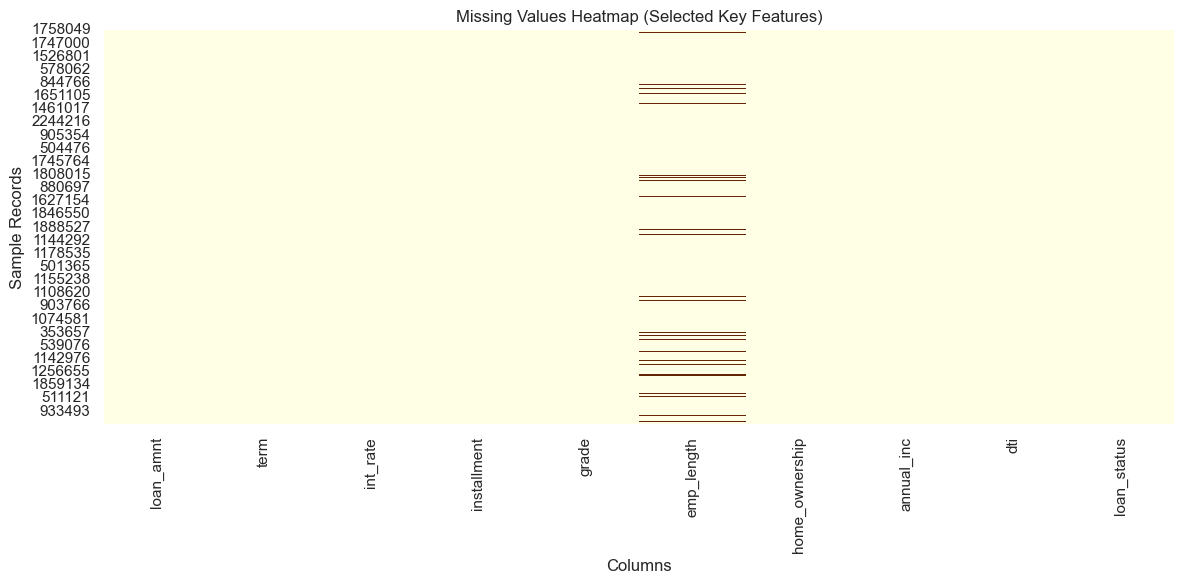

In [34]:
# --- Visual Heatmap of Missing Values ---
cols_to_plot = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
    'emp_length', 'home_ownership', 'annual_inc', 'dti', 'loan_status'
]

plt.figure(figsize=(12, 6))
sns.heatmap(df_sample[cols_to_plot].isnull(), cbar=False, cmap='YlOrBr')
plt.title('Missing Values Heatmap (Selected Key Features)', fontsize=12)
plt.xlabel('Columns')
plt.ylabel('Sample Records')
plt.tight_layout()
plt.show()

### Interpretation of Missing Values Heatmap

The heatmap above illustrates the distribution of missing data across the key variables of the Lending Club dataset.  
Only a small proportion of values are missing, concentrated mainly in **employment length (`emp_length`)** and a few isolated cases within **grade-related fields**.  
Core variables such as **loan amount**, **interest rate**, **installment**, and **loan status** show **no missing values**, ensuring high reliability for KPI computation.

This confirms that the dataset is largely complete and requires only minimal data cleaning before transformation.  
Columns with sparse or redundant information (e.g., hardship or deferral-related fields) will be excluded in the upcoming *Project Implementation* phase to optimize data quality and efficiency.


In [41]:
df_sample.to_csv("loan_portfolio.csv", index=False)

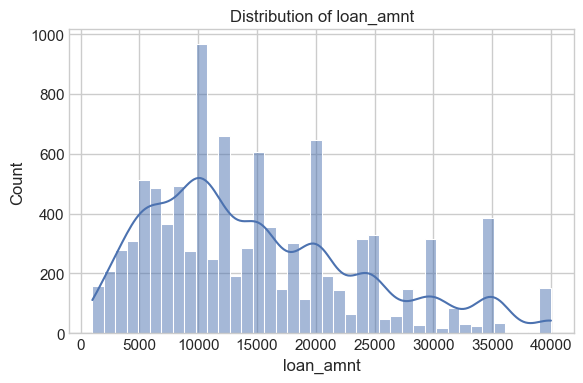

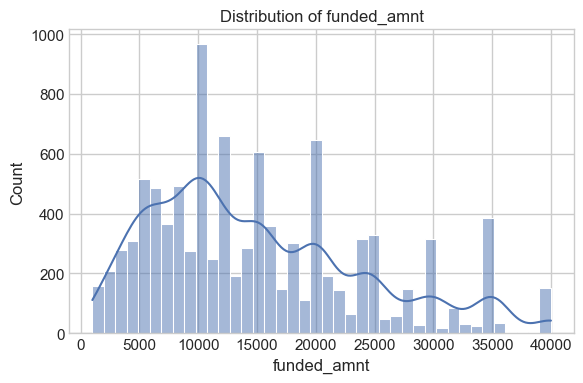

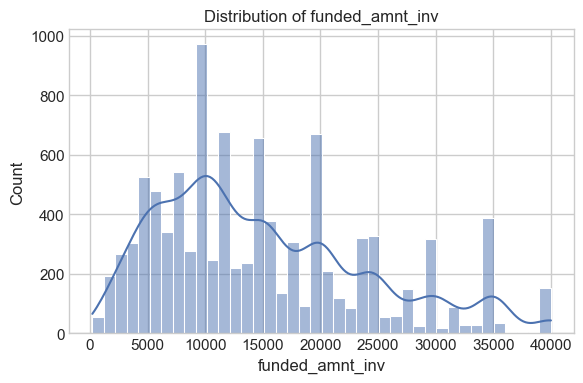

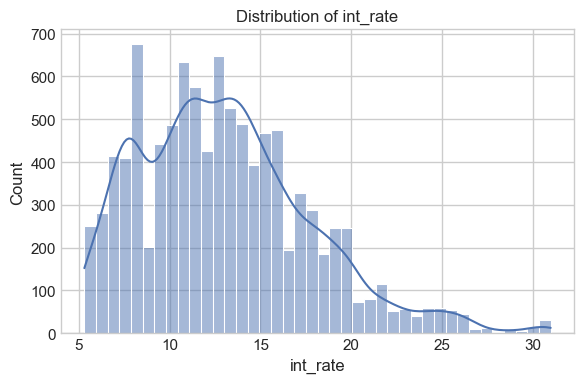

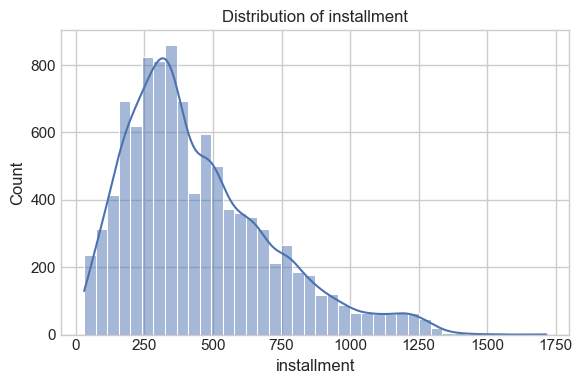

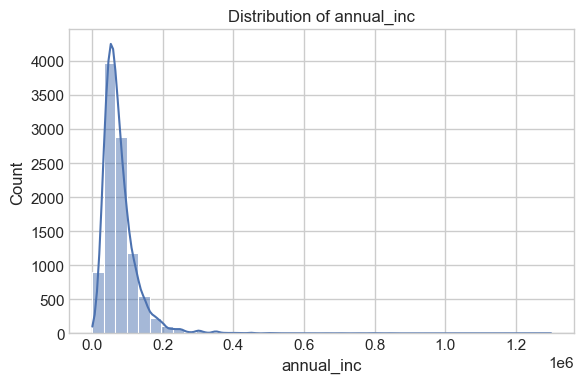

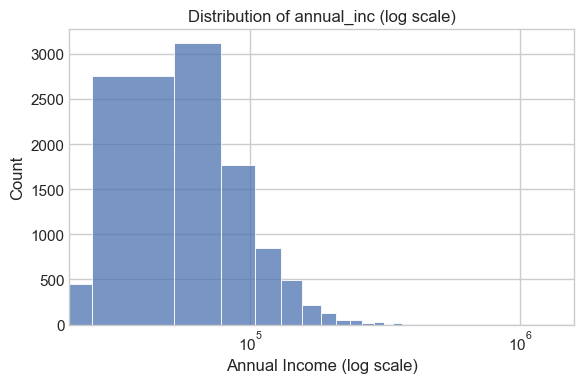

In [35]:
# --- Distribution plots for numeric features  ---
plt.style.use('seaborn-v0_8-whitegrid')

num_features_to_plot = num_cols[:6]  # show only first 6 for clarity

for col in num_features_to_plot:
    plt.figure(figsize=(6,4))
    sns.histplot(df_sample[col], bins=40, kde=True)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# --- Special case: Annual Income (log scale due to extreme values) ---
plt.figure(figsize=(6,4))
sns.histplot(df_sample['annual_inc'], bins=50)
plt.xscale('log')
plt.title('Distribution of annual_inc (log scale)', fontsize=12)
plt.xlabel('Annual Income (log scale)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



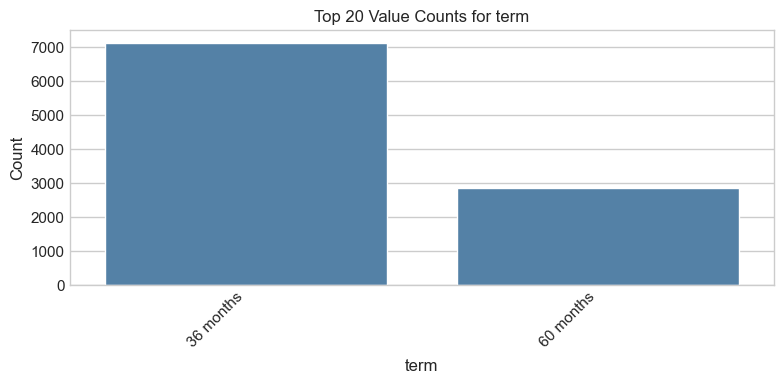

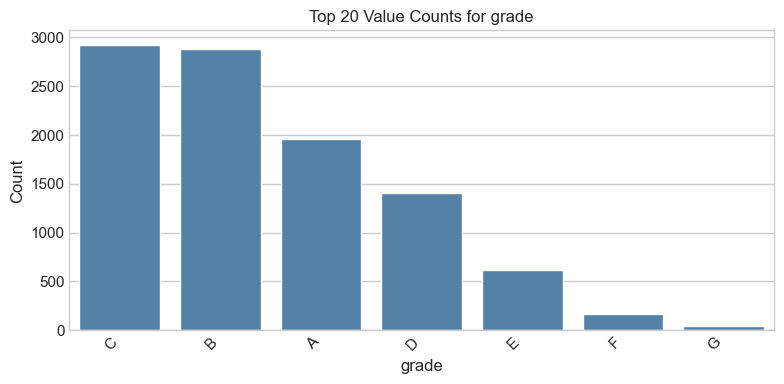

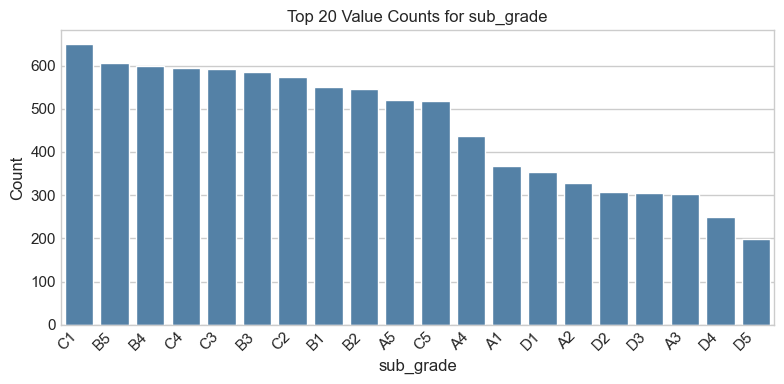

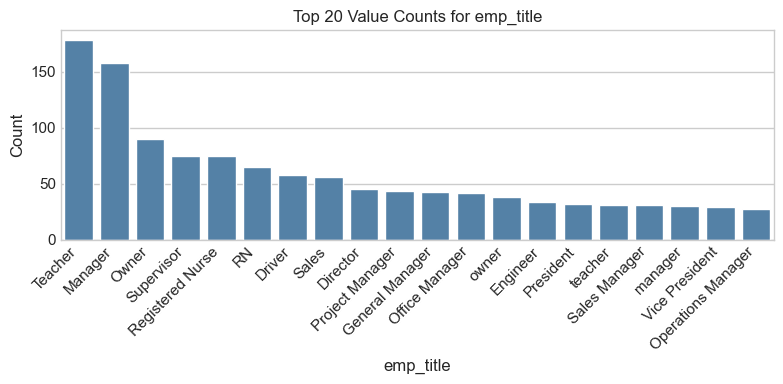

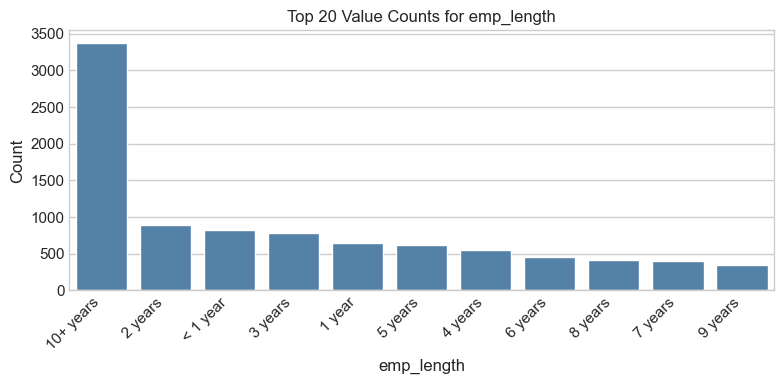

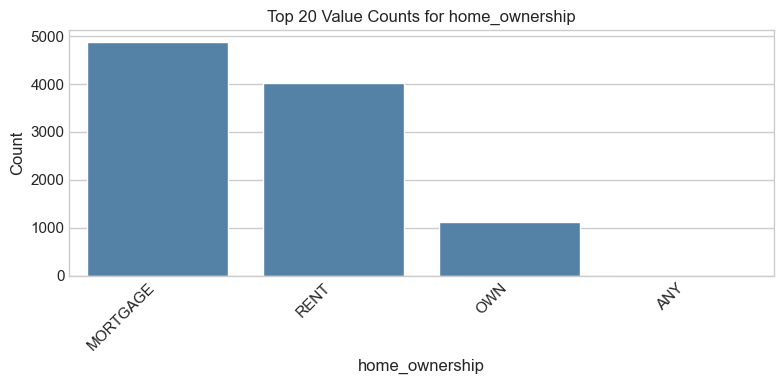

In [36]:
# --- Count plot for categorical features (top N values for clarity) ---
cat_cols = [c for c in df_sample.select_dtypes('object').columns if df_sample[c].notnull().sum() > 0]

for col in cat_cols[:6]:
    plt.figure(figsize=(8, 4))

    # Show only top 20 categories
    top_values = df_sample[col].value_counts().head(20)
    sns.barplot(x=top_values.index, y=top_values.values, color='steelblue')

    plt.title(f'Top 20 Value Counts for {col}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


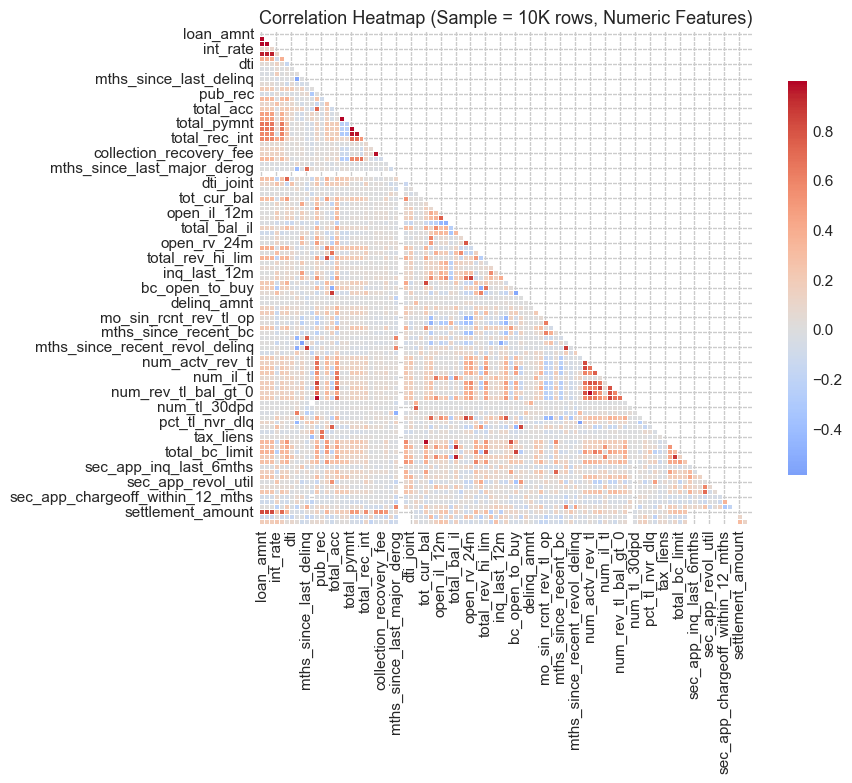

In [37]:
# --- Correlation Heatmap ---
corr = df_sample.corr(numeric_only=True)

# 2. Plot only the upper triangle for readability
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    center=0,
    annot=False,
    linewidths=.5,
    cbar_kws={'shrink': .8},
    square=True
)
plt.title('Correlation Heatmap (Sample = 10K rows, Numeric Features)', fontsize=13)
plt.tight_layout()
plt.show()

### Correlation Insights

The correlation heatmap confirms several expected financial relationships:

- There is a **strong positive correlation** between `loan_amnt`, `funded_amnt`, and `installment`, indicating internal consistency between the requested loan, the funded amount, and the borrower’s monthly payment.  
- **Interest rate (`int_rate`)** shows a **negative correlation with loan grades**, reflecting that higher credit quality (Grade A–B) corresponds to lower interest rates.  
- **Debt-to-income ratio (`dti`)** and **annual income (`annual_inc`)** are weakly related, suggesting income diversity among borrowers.  
- Most other correlations are moderate to low, supporting the heterogeneity of the portfolio and confirming the absence of redundant numerical variables.

Overall, these relationships validate the dataset’s internal coherence and financial realism.


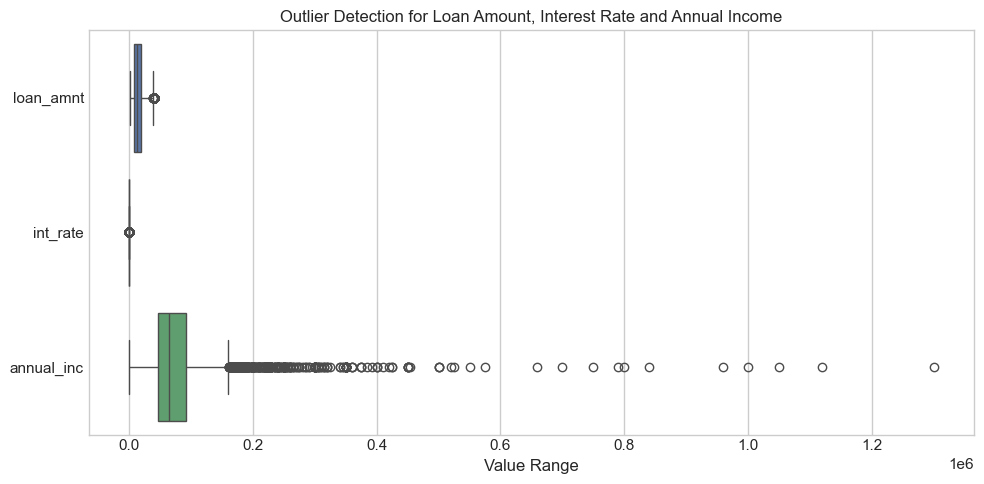

In [38]:
# --- Boxplots for detecting outliers in key numeric variables ---

plt.figure(figsize=(10,5))
sns.boxplot(data=df_sample[['loan_amnt', 'int_rate', 'annual_inc']], orient='h')
plt.title('Outlier Detection for Loan Amount, Interest Rate and Annual Income', fontsize=12)
plt.xlabel('Value Range')
plt.tight_layout()
plt.show()

### Interpretation of Outliers

The boxplot visualization reveals the presence of several extreme values:

- **Loan Amount (`loan_amnt`)**: A small number of loans exceed \$35,000, representing high-value loans that can disproportionately affect portfolio averages.
- **Interest Rate (`int_rate`)**: Few cases show unusually high interest rates (>25%), likely linked to low-grade or high-risk borrowers.
- **Annual Income (`annual_inc`)**: Strong right-skewness and multiple extreme values (> \$500K) indicate high-income outliers, which will be treated via log transformation in the data preprocessing phase.

These outliers do not represent data errors but genuine heterogeneity within the portfolio. During the KPI pipeline implementation, appropriate transformations (e.g., log scaling or winsorization) will ensure robust KPI computation.


### Interpretation of Categorical Features

The categorical feature distributions highlight several borrower-level characteristics relevant to credit risk evaluation:

- **Loan Term (`term`)**: The majority of loans have a 36-month duration, indicating a borrower preference for shorter repayment periods, which generally carry lower credit risk.
- **Credit Grade (`grade`, `sub_grade`)**: Most borrowers are concentrated in mid-quality grades (B–C), consistent with a balanced loan portfolio and moderate credit risk exposure.
- **Employment Title (`emp_title`)**: High-frequency job titles such as *Teacher*, *Manager*, and *Owner* suggest a borrower base with relatively stable employment and income sources.
- **Employment Length (`emp_length`)**: Over one-third of borrowers report more than 10 years of employment, reinforcing portfolio stability and long-term earning capacity.
- **Home Ownership (`home_ownership`)**: The majority of borrowers have either *mortgages* or *rental agreements*, reflecting a typical mix of secured and unsecured loan applicants.

These categorical patterns provide useful segmentation variables for subsequent KPI calculations (e.g., default rate by grade or by employment stability).

### KPI Feature Alignment

The exploratory analysis confirms that the selected features directly support the calculation of key loan portfolio KPIs:

| KPI | Relevant Features | EDA Insight |
|-----|--------------------|-------------|
| **Default Rate** | `loan_status`, `grade`, `emp_length`, `home_ownership` | Default likelihood varies with borrower credit quality and employment stability. |
| **Average Loan Amount** | `loan_amnt`, `funded_amnt`, `term` | Most loans cluster around \$15K with typical repayment terms of 36 months. |
| **Average Interest Rate** | `int_rate`, `grade` | Lower grades correspond to higher interest rates, confirming expected risk–return dynamics. |
| **Portfolio Growth** | `issue_d`, `funded_amnt_inv` | Temporal features enable time-based growth tracking across loan issues. |
| **Loan Distribution by Grade** | `grade`, `sub_grade` | Balanced distribution across B–C grades, suitable for credit segmentation analysis. |

These alignments ensure that the dataset structure and feature integrity are directly applicable for KPI computation and downstream API exposure.
